In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data, meta = arff.loadarff('../datasets/rawData/telecom1.arff')
df = pd.DataFrame(data)
df.to_csv('../datasets/telecom1.csv', index = False)

In [ ]:
df = pd.read_csv('../datasets/telecom1.csv')
print(df.head())

      Project  CHANGES  FILES  ACT_EFF
0  b'Case_01'    218.0  105.0   305.22
1  b'Case_02'    357.0  237.0   330.29
2  b'Case_03'    136.0   98.0   333.96
3  b'Case_04'     25.0   24.0   150.40
4  b'Case_05'    263.0  197.0   544.61


# 1 Conversion to Numerical Data

All columns appear to be numeric (float64) already, so no additional conversion is needed.

In [6]:
print("\n Conversion to Numerical Data")
print("\n Data types of columns:")
print(df.dtypes)
print(df.head())


 Conversion to Numerical Data

 Data types of columns:
CHANGES    float64
FILES      float64
ACT_EFF    float64
dtype: object
   CHANGES  FILES  ACT_EFF
0    218.0  105.0   305.22
1    357.0  237.0   330.29
2    136.0   98.0   333.96
3     25.0   24.0   150.40
4    263.0  197.0   544.61


In [5]:
df = df.drop(columns=['Project'])

# 2 Sequential Conversion and Time Indexing


In [ ]:
# print(df['Duration'].value_counts().sort_index())

# print("\n=== Sequential conversion and time indexing ===")
# df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
# df = df.rename(columns={'Duration': 'DurationMonths'})
# df = df.sort_values('DurationMonths')
# df = df.set_index('DurationMonths')

# print("The first 5 rows of the newly created 'DurationMonths' index:")
# print(df.index[:5])

# 3 Missing Data Processing

Check and handle NaN values to ensure data completeness. Fill missing values in numeric columns with the mean.

In [7]:
print("\nMissing Data Processing")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values")
else:
    print("Have missing values")
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


Missing Data Processing
No missing values


### Handling Negative Values

The China dataset doesn’t explicitly show negative values in the sample, but we’ll add a check for safety.

In [ ]:
# print("\nHandling negative values:")
# if (df < 0).any().any():
#     df[df < 0] = 0
#     print("Replaced negative values with 0.")
# else:
#     print("No negative values found in the dataset.")

# 4 Handling Outliers (Value Capping)

Mitigate the impact of outliers by capping them within an acceptable range based on the IQR.

In [8]:
print("\nHandling Outliers (Value Capping)")
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    cap_outliers(df, col)

print("Outliers capped using IQR method.")


Handling Outliers (Value Capping)
Outliers capped using IQR method.


# 6. Data Splitting

Split the dataset into training and testing sets using an 80/20 ratio, with 'Effort' as the target variable.

In [ ]:
# print("\nData Splitting (Partitioning)")
# X = df.drop(columns=['ACT_EFF'])
# y = df['ACT_EFF']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(f"Total number of samples: {len(df)}")
# print(f"- Training samples (X_train): {len(X_train)}")
# print(f"- Testing samples (X_test): {len(X_test)}")


Data Splitting (Partitioning)
Total number of samples: 499
- Training samples (X_train): 399
- Testing samples (X_test): 100


# 7. Data Standardization

Standardize features using StandardScaler for zero mean and unit variance.

In [ ]:
# print("\nData Standardization (StandardScaler)")
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# X_train_scaled = scaler_X.fit_transform(X_train)
# X_test_scaled = scaler_X.transform(X_test)

# y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# print("\nStatistics before standardization (X_train):")
# print(X_train.describe().T[['mean', 'std']])

# print("\nStatistics after standardization (X_train_scaled):")
# print(X_train_scaled_df.describe().T[['mean', 'std']])


# 8. Inverse Transformation

Apply inverse transformation to return standardized data to its original scale.

In [ ]:
# print("\nInverse Transformation")

# X_train_original = scaler_X.inverse_transform(X_train_scaled)
# y_train_original = scaler_y.inverse_transform(y_train_scaled)

# X_train_original_df = pd.DataFrame(X_train_original, columns=X_train.columns, index=X_train.index)

# print("\n=== X_train data after inverse transformation (original scale) ===")
# print(pd.DataFrame(X_train_original, columns=X_train.columns).head())

# print("\n=== y_train target after inverse transformation ===")
# print(y_train_original[:5].flatten())


In [ ]:
df.to_csv("../datasets/cleanedData/telecom_processed.csv", index=True)

# 8. LSTM


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from mealpy import FloatVar, IntegerVar, WOA
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../datasets/cleanedData/telecom_processed.csv")

# Features and target
X = df.drop(columns=['ACT_EFF']).values
y = df['ACT_EFF'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Reshape for LSTM (samples, timesteps, features)
input_shape = (X_train_scaled.shape[1], 1)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [ ]:

# Define the LSTM model creation function
def create_lstm_model(learning_rate, epochs, batch_size, input_shape):
    model = Sequential()
    model.add(LSTM(units=64, activation='tanh', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Objective function for optimization
def objective_function(solution, X_train, y_train, input_shape, use_sequences=True):
    learning_rate, epochs, batch_size = solution
    model = create_lstm_model(learning_rate, epochs, batch_size, input_shape)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
    y_pred_scaled = model.predict(X_train, verbose=0).flatten()
    mse = mean_squared_error(y_train, y_pred_scaled)
    return mse

# Define the problem dictionary with bounds
problem_dict = {
    "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape),
    "bounds": [
        FloatVar(lb=0.0001, ub=1, name="learning_rate"),
        IntegerVar(lb=1, ub=100, name="epochs"),
        IntegerVar(lb=1, ub=100, name="batch_size")
    ],
    "minmax": "min"
}

In [ ]:
# Run WOA
optimizer = WOA.OriginalWOA(epoch=10, pop_size=30)
best_solution = optimizer.solve(problem_dict)

# Extract optimized hyperparameters
best_learning_rate = best_solution.solution[0]
best_epochs = int(best_solution.solution[1])
best_batch_size = int(best_solution.solution[2])

print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}")

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025/05/03 11:51:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\

Optimized Hyperparameters: Learning Rate = 0.173680, Epochs = 89, Batch Size = 100


In [ ]:

# Build and train the final LSTM
final_model = create_lstm_model(best_learning_rate, best_epochs, best_batch_size, input_shape)
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
                          verbose=1, validation_split=0.2)

# Predict on test set (in scaled space)
y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# Reverse transform predictions and test values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred_scaled)

# Calculate relative errors for MMRE and MdMRE
relative_errors = np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)
mmre = np.mean(relative_errors)
mdmre = np.median(relative_errors)

# Calculate PRED(25)
pred25 = np.mean(relative_errors <= 0.25) * 100

# Print all metrics
print(f"\nEvaluation Metrics (Scaled):")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MMRE: {mmre:.4f}")
print(f"MdMRE: {mdmre:.4f}")
print(f"PRED(25): {pred25:.2f}%")

# Display actual vs predicted values
print("\nActual vs Predicted (Original Scale):")
for actual, pred in zip(y_test_original, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")


Epoch 1/89


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1376 - val_loss: 171.2097
Epoch 2/89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 68.3977 - val_loss: 19.7314
Epoch 3/89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 16.1743 - val_loss: 78.5895
Epoch 4/89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 44.1644 - val_loss: 1.6864
Epoch 5/89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.4260 - val_loss: 6.3274
Epoch 6/89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 7.4144 - val_loss: 2.0300
Epoch 7/89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 3.0868 - val_loss: 0.4826
Epoch 8/89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2953 - val_loss: 0.4578
Epoch 9/89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2143 - val_loss: 0.4313
Epoch 10/89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2519 - val_loss: 0.4118
Epoch 11/89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.2481 - val_loss: 0.3964
Epoch 12/89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2549 - val_loss: 0.3799
Epoch 1

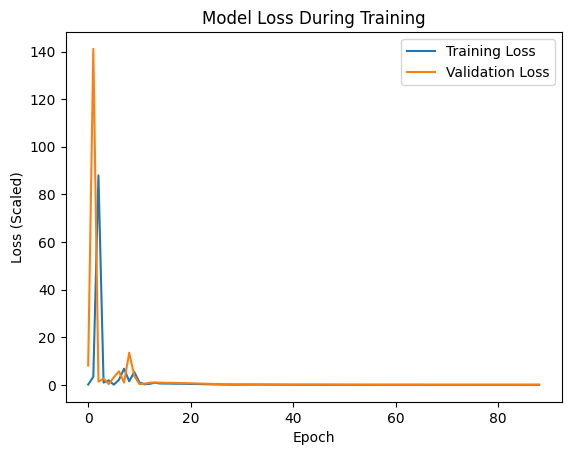

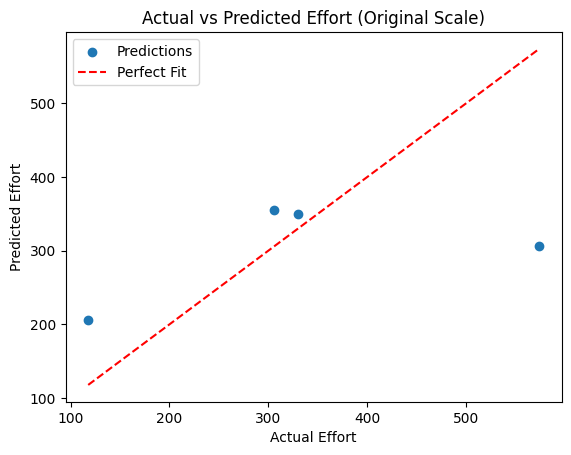

In [23]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Scaled)')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.scatter(y_test_original, y_pred, label='Predictions')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Effort')
plt.ylabel('Predicted Effort')
plt.title('Actual vs Predicted Effort (Original Scale)')
plt.legend()
plt.show()

# CNN

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025/05/04 02:37:52 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do no

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(sha

Optimized Hyperparameters: Learning Rate = 0.051169, Epochs = 100, Batch Size = 100
Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1498 - val_loss: 0.2740
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0586 - val_loss: 0.1705
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0435 - val_loss: 0.1102
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0614 - val_loss: 0.2019
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0361 - val_loss: 0.2209
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0334 - val_loss: 0.1364
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0124 - val_loss: 0.0895
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0190 - val_loss: 0.0912
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0371 - val_loss: 0.0894
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0274 - val_loss: 0.1495
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0106 - val_loss: 0.2465
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0256 - val_loss: 0.2651
Epo

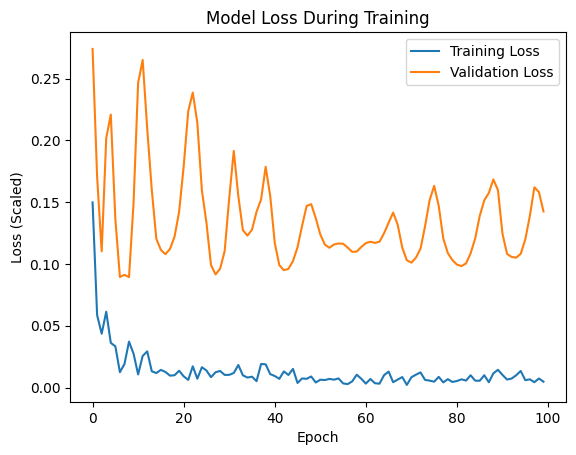

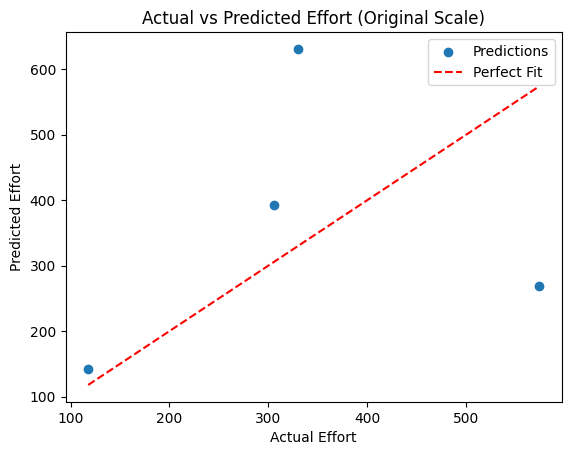

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from mealpy import FloatVar, IntegerVar, WOA
import matplotlib.pyplot as plt


df = pd.read_csv("../datasets/cleanedData/telecom_processed.csv")


# Features and target
X = df.drop(columns=['ACT_EFF']).values
y = df['ACT_EFF'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Reshape for 1D CNN (samples, timesteps, features)
input_shape = (X_train_scaled.shape[1], 1)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model creation function
def create_cnn_model(learning_rate, epochs, batch_size, input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Define the objective function for WOA
def objective_function(solution, X_train, y_train, input_shape, use_sequences=True):
    learning_rate, epochs, batch_size = solution
    model = create_cnn_model(learning_rate, epochs, batch_size, input_shape)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
    y_pred_scaled = model.predict(X_train, verbose=0).flatten()
    mse = mean_squared_error(y_train, y_pred_scaled)
    return mse

# Define the problem dictionary with bounds
problem_dict = {
    "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape, use_sequences=True),
    "bounds": [
        FloatVar(lb=0.0001, ub=1, name="learning_rate"),
        IntegerVar(lb=1, ub=100, name="epochs"),
        IntegerVar(lb=1, ub=100, name="batch_size")
    ],
    "minmax": "min"
}

# Run WOA
optimizer = WOA.OriginalWOA(epoch=10, pop_size=30)
best_solution = optimizer.solve(problem_dict)

# Extract optimized hyperparameters
best_learning_rate = best_solution.solution[0]
best_epochs = int(best_solution.solution[1])
best_batch_size = int(best_solution.solution[2])

print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}")

# Build and train the final CNN
final_model = create_cnn_model(best_learning_rate, best_epochs, best_batch_size, input_shape)
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
                          verbose=1, validation_split=0.2)

# Predict on test set (in scaled space)
y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# Reverse transform predictions and test values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred_scaled)

# Calculate relative errors for MMRE and MdMRE
relative_errors = np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)
mmre = np.mean(relative_errors)
mdmre = np.median(relative_errors)

# Calculate PRED(25)
pred25 = np.mean(relative_errors <= 0.25) * 100

# Print all metrics
print(f"\nEvaluation Metrics (Scaled):")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MMRE: {mmre:.4f}")
print(f"MdMRE: {mdmre:.4f}")
print(f"PRED(25): {pred25:.2f}%")

# Display actual vs predicted values
print("\nActual vs Predicted (Original Scale):")
for actual, pred in zip(y_test_original, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Scaled)')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.scatter(y_test_original, y_pred, label='Predictions')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Effort')
plt.ylabel('Predicted Effort')
plt.title('Actual vs Predicted Effort (Original Scale)')
plt.legend()
plt.show()

# MLP

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from mealpy import FloatVar, IntegerVar, WOA
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../datasets/cleanedData/telecom_processed.csv")

# Features and target
X = df.drop(columns=['ACT_EFF']).values
y = df['ACT_EFF'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Input shape for MLP (samples, features)
input_shape = (X_train_scaled.shape[1],)

# Define the MLP model creation function
def create_mlp_model(learning_rate, epochs, batch_size, input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Define the objective function for WOA
def objective_function(solution, X_train, y_train, input_shape):
    learning_rate, epochs, batch_size = solution
    model = create_mlp_model(learning_rate, epochs, batch_size, input_shape)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
    y_pred_scaled = model.predict(X_train, verbose=0).flatten()
    mse = mean_squared_error(y_train, y_pred_scaled)
    return mse

# Define the problem dictionary with bounds
problem_dict = {
    "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape),
    "bounds": [
        FloatVar(lb=0.0001, ub=1, name="learning_rate"),
        IntegerVar(lb=1, ub=100, name="epochs"),
        IntegerVar(lb=1, ub=100, name="batch_size")
    ],
    "minmax": "min"
}

# Run WOA
optimizer = WOA.OriginalWOA(epoch=5, pop_size=30)
best_solution = optimizer.solve(problem_dict)

# Extract optimized hyperparameters
best_learning_rate = best_solution.solution[0]
best_epochs = int(best_solution.solution[1])
best_batch_size = int(best_solution.solution[2])

print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}")

# Train the MLP model
final_model = create_mlp_model(best_learning_rate, best_epochs, best_batch_size, input_shape)
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
                          verbose=1, validation_split=0.2)

# Predict in scaled space
y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# Inverse transform to original space
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Evaluation metrics in scaled space
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
mre_scaled = np.abs((y_test_scaled - y_pred_scaled) / (y_test_scaled + 1e-8))
mmre_scaled = np.mean(mre_scaled)
mdmre_scaled = np.median(mre_scaled)
pred25_scaled = np.mean(mre_scaled <= 0.25) * 100

# Evaluation metrics in original space
mse_original = mean_squared_error(y_test_original, y_pred)
mae_original = mean_absolute_error(y_test_original, y_pred)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred)
mre_original = np.abs((y_test_original - y_pred) / (y_test_original + 1e-8))
mmre_original = np.mean(mre_original)
mdmre_original = np.median(mre_original)
pred25_original = np.mean(mre_original <= 0.25) * 100

# Print metrics in scaled space
print("\n📉 Evaluation Metrics (Scaled Space):")
print(f"MSE       : {mse_scaled:.6f}")
print(f"MAE       : {mae_scaled:.6f}")
print(f"RMSE      : {rmse_scaled:.6f}")
print(f"R²        : {r2_scaled:.6f}")
print(f"MMRE      : {mmre_scaled:.6f}")
print(f"MdMRE     : {mdmre_scaled:.6f}")
print(f"PRED(25)  : {pred25_scaled:.2f}%")

# Print metrics in original space
print("\n📈 Evaluation Metrics (Original Space):")
print(f"MSE       : {mse_original:.6f}")
print(f"MAE       : {mae_original:.6f}")
print(f"RMSE      : {rmse_original:.6f}")
print(f"R²        : {r2_original:.6f}")
print(f"MMRE      : {mmre_original:.6f}")
print(f"MdMRE     : {mdmre_original:.6f}")
print(f"PRED(25)  : {pred25_original:.2f}%")

# Optional: Actual vs Predicted values
print("\n🎯 Actual vs Predicted (Original Scale):")
for actual, pred in zip(y_test_original, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Scaled)')
plt.legend()
plt.savefig('mlp_training_loss.png')
plt.close()

# Plot actual vs predicted (Original Scale)
plt.scatter(y_test_original, y_pred, label='Predictions')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Effort')
plt.ylabel('Predicted Effort')
plt.title('Actual vs Predicted Effort (Original Scale)')
plt.legend()
plt.savefig('mlp_actual_vs_predicted.png')
plt.close()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025/05/17 10:35:25 AM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argume

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the mode

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the mode

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the mode

Optimized Hyperparameters: Learning Rate = 0.031056, Epochs = 100, Batch Size = 100
Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1545 - val_loss: 1.1226
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.2693 - val_loss: 0.1514
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0537 - val_loss: 0.1904
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0734 - val_loss: 0.1256
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0393 - val_loss: 0.0998
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0173 - val_loss: 0.1585
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0378 - val_loss: 0.2130
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0401 - val_loss: 0.1614
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0226 - val_loss: 0.0989
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0269 - val_loss: 0.0896
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0228 - val_loss: 0.0887
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0237 - val_loss: 0.0887
Epo

# BiLSTM

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025/06/08 08:31:01 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Lo

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Lo

Optimized Hyperparameters: Learning Rate = 0.025150, Epochs = 100, Batch Size = 80, LSTM Units = 66
Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1538 - val_loss: 0.1176
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0267 - val_loss: 0.5844
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1794 - val_loss: 0.1098
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0422 - val_loss: 0.2051
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0793 - val_loss: 0.2056
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0803 - val_loss: 0.1636
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0542 - val_loss: 0.1205
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0400 - val_loss: 0.1116
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0307 - val_loss: 0.1387
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0328 - val_loss: 0.1628
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0419 - val_loss: 0.1509
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0321 - val_loss: 0.1230
Epo

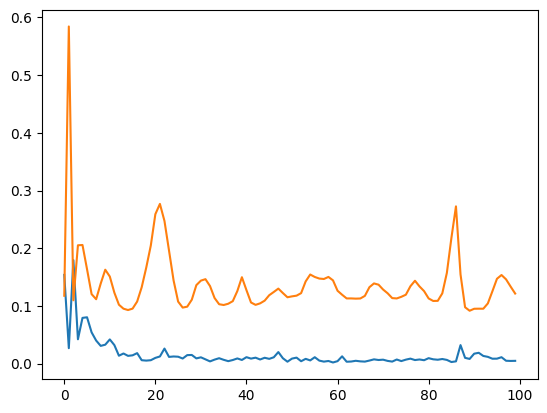

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from mealpy import FloatVar, IntegerVar, WOA
import matplotlib.pyplot as plt
import uuid

# Load data
df = pd.read_csv("../datasets/cleanedData/telecom_processed.csv")

# Features and target
X = df.drop(columns=['ACT_EFF']).values
y = df['ACT_EFF'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Reshape data for BiLSTM: (samples, timesteps, features)
timesteps = 1
features = X_train_scaled.shape[1]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, features))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, features))
input_shape = (timesteps, features)

# Define the BiLSTM model creation function
def create_bilstm_model(learning_rate, epochs, batch_size, lstm_units, input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=int(lstm_units), activation='tanh'), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Define the objective function for WOA
def objective_function(solution, X_train, y_train, input_shape):
    learning_rate, epochs, batch_size, lstm_units = solution
    model = create_bilstm_model(learning_rate, epochs, batch_size, lstm_units, input_shape)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
    y_pred_scaled = model.predict(X_train, verbose=0).flatten()
    mse = mean_squared_error(y_train, y_pred_scaled)
    return mse

# Define the problem dictionary with bounds
problem_dict = {
    "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape),
    "bounds": [
        FloatVar(lb=0.0001, ub=1, name="learning_rate"),
        IntegerVar(lb=1, ub=100, name="epochs"),
        IntegerVar(lb=1, ub=100, name="batch_size"),
        IntegerVar(lb=16, ub=128, name="lstm_units")
    ],
    "minmax": "min"
}

# Run WOA
optimizer = WOA.OriginalWOA(epoch=5, pop_size=30)
best_solution = optimizer.solve(problem_dict)

# Extract optimized hyperparameters
best_learning_rate = best_solution.solution[0]
best_epochs = int(best_solution.solution[1])
best_batch_size = int(best_solution.solution[2])
best_lstm_units = int(best_solution.solution[3])

print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}, LSTM Units = {best_lstm_units}")

# Train the BiLSTM model
final_model = create_bilstm_model(best_learning_rate, best_epochs, best_batch_size, best_lstm_units, input_shape)
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
                          verbose=1, validation_split=0.2)

# Predict in scaled space
y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# Inverse transform to original space
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Evaluation metrics in scaled space
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
mre_scaled = np.abs((y_test_scaled - y_pred_scaled) / (y_test_scaled + 1e-8))
mmre_scaled = np.mean(mre_scaled)
mdmre_scaled = np.median(mre_scaled)
pred25_scaled = np.mean(mre_scaled <= 0.25) * 100

# Evaluation metrics in original space
mse_original = mean_squared_error(y_test_original, y_pred)
mae_original = mean_absolute_error(y_test_original, y_pred)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred)
mre_original = np.abs((y_test_original - y_pred) / (y_test_original + 1e-8))
mmre_original = np.mean(mre_original)
mdmre_original = np.median(mre_original)
pred25_original = np.mean(mre_original <= 0.25) * 100

# Print metrics in scaled space
print("\n📉 Evaluation Metrics (Scaled Space):")
print(f"MSE       : {mse_scaled:.6f}")
print(f"MAE       : {mae_scaled:.6f}")
print(f"RMSE      : {rmse_scaled:.6f}")
print(f"R²        : {r2_scaled:.6f}")
print(f"MMRE      : {mmre_scaled:.6f}")
print(f"MdMRE     : {mdmre_scaled:.6f}")
print(f"PRED(25)  : {pred25_scaled:.2f}%")

# Print metrics in original space
print("\n📈 Evaluation Metrics (Original Space):")
print(f"MSE       : {mse_original:.6f}")
print(f"MAE       : {mae_original:.6f}")
print(f"RMSE      : {rmse_original:.6f}")
print(f"R²        : {r2_original:.6f}")
print(f"MMRE      : {mmre_original:.6f}")
print(f"MdMRE     : {mdmre_original:.6f}")
print(f"PRED(25)  : {pred25_original:.2f}%")

# Optional: Actual vs Predicted values
print("\n🎯 Actual vs Predicted (Original Scale):")
for actual, pred in zip(y_test_original, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# RNN

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025/06/08 09:32:54 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the fi

Optimized Hyperparameters: Learning Rate = 0.002342, Epochs = 63, Batch Size = 72, RNN Units = 48
Epoch 1/63


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0795 - val_loss: 0.1252
Epoch 2/63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0366 - val_loss: 0.0938
Epoch 3/63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0333 - val_loss: 0.0930
Epoch 4/63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0124 - val_loss: 0.1285
Epoch 5/63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0077 - val_loss: 0.1730
Epoch 6/63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0211 - val_loss: 0.1875
Epoch 7/63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0249 - val_loss: 0.1694
Epoch 8/63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0234 - val_loss: 0.1364
Epoch 9/63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0098 - val_loss: 0.1079
Epoch 10/63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0110 - val_loss: 0.0884
Epoch 11/63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0152 - val_loss: 0.0799
Epoch 12/63
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0073 - val_loss: 0.0779
Epoch 13/63
1/

Text(0.5, 1.0, 'Simple RNN Model Loss During Training')

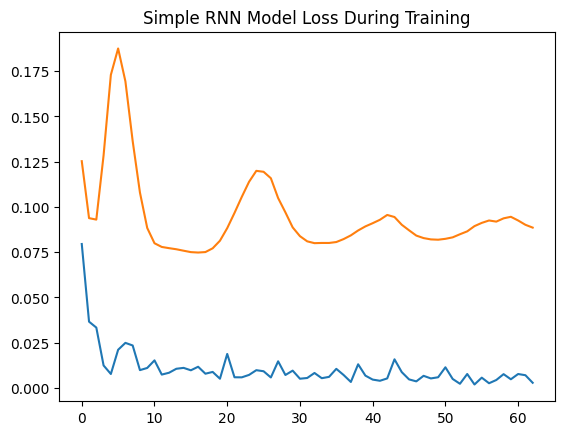

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from tensorflow.keras.optimizers import Adam
from mealpy import FloatVar, IntegerVar, WOA
import matplotlib.pyplot as plt
import uuid

# Load data
df = pd.read_csv("../datasets/cleanedData/telecom_processed.csv")

# Features and target
X = df.drop(columns=['ACT_EFF']).values
y = df['ACT_EFF'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Reshape data for RNN: (samples, timesteps, features)
timesteps = 1
features = X_train_scaled.shape[1]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, features))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, features))
input_shape = (timesteps, features)

# Define the RNN model creation function
def create_rnn_model(learning_rate, epochs, batch_size, rnn_units, input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=int(rnn_units), activation='tanh', input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Regression output
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Define the objective function for WOA
def objective_function(solution, X_train, y_train, input_shape):
    learning_rate, epochs, batch_size, rnn_units = solution
    model = create_rnn_model(learning_rate, epochs, batch_size, rnn_units, input_shape)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0, validation_split=0.2)
    y_pred_scaled = model.predict(X_train, verbose=0).flatten()
    mse = mean_squared_error(y_train, y_pred_scaled)
    return mse

# Define the problem dictionary with bounds
problem_dict = {
    "obj_func": lambda solution: objective_function(solution, X_train_scaled, y_train_scaled, input_shape),
    "bounds": [
        FloatVar(lb=0.0001, ub=1, name="learning_rate"),
        IntegerVar(lb=1, ub=100, name="epochs"),
        IntegerVar(lb=1, ub=100, name="batch_size"),
        IntegerVar(lb=16, ub=128, name="rnn_units")
    ],
    "minmax": "min"
}

# Run WOA
optimizer = WOA.OriginalWOA(epoch=5, pop_size=30)
best_solution = optimizer.solve(problem_dict)

# Extract optimized hyperparameters
best_learning_rate = best_solution.solution[0]
best_epochs = int(best_solution.solution[1])
best_batch_size = int(best_solution.solution[2])
best_rnn_units = int(best_solution.solution[3])

print(f"Optimized Hyperparameters: Learning Rate = {best_learning_rate:.6f}, Epochs = {best_epochs}, Batch Size = {best_batch_size}, RNN Units = {best_rnn_units}")

# Train the RNN model
final_model = create_rnn_model(best_learning_rate, best_epochs, best_batch_size, best_rnn_units, input_shape)
history = final_model.fit(X_train_scaled, y_train_scaled, epochs=best_epochs, batch_size=best_batch_size,
                          verbose=1, validation_split=0.2)

# Predict in scaled space
y_pred_scaled = final_model.predict(X_test_scaled, verbose=0).flatten()

# Inverse transform to original space
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Evaluation metrics in scaled space
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
mre_scaled = np.abs((y_test_scaled - y_pred_scaled) / (y_test_scaled + 1e-8))
mmre_scaled = np.mean(mre_scaled)
mdmre_scaled = np.median(mre_scaled)
pred25_scaled = np.mean(mre_scaled <= 0.25) * 100

# Evaluation metrics in original space
mse_original = mean_squared_error(y_test_original, y_pred)
mae_original = mean_absolute_error(y_test_original, y_pred)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred)
mre_original = np.abs((y_test_original - y_pred) / (y_test_original + 1e-8))
mmre_original = np.mean(mre_original)
mdmre_original = np.median(mre_original)
pred25_original = np.mean(mre_original <= 0.25) * 100

# Print metrics in scaled space
print("\n📉 Evaluation Metrics (Scaled Space):")
print(f"MSE       : {mse_scaled:.6f}")
print(f"MAE       : {mae_scaled:.6f}")
print(f"RMSE      : {rmse_scaled:.6f}")
print(f"R²        : {r2_scaled:.6f}")
print(f"MMRE      : {mmre_scaled:.6f}")
print(f"MdMRE     : {mdmre_scaled:.6f}")
print(f"PRED(25)  : {pred25_scaled:.2f}%")

# Print metrics in original space
print("\n📈 Evaluation Metrics (Original Space):")
print(f"MSE       : {mse_original:.6f}")
print(f"MAE       : {mae_original:.6f}")
print(f"RMSE      : {rmse_original:.6f}")
print(f"R²        : {r2_original:.6f}")
print(f"MMRE      : {mmre_original:.6f}")
print(f"MdMRE     : {mdmre_original:.6f}")
print(f"PRED(25)  : {pred25_original:.2f}%")

# Optional: Actual vs Predicted values
print("\n🎯 Actual vs Predicted (Original Scale):")
for actual, pred in zip(y_test_original, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Simple RNN Model Loss During Training')

# MODEL EVALUATION (Original Scale)

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred_scaled)

# Calculate relative errors for MMRE and MdMRE
relative_errors = np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)
mmre = np.mean(relative_errors)
mdmre = np.median(relative_errors)

# Calculate PRED(25)
pred25 = np.mean(relative_errors <= 0.25) * 100

# Print all metrics
print(f"\nEvaluation Metrics (Scaled):")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MMRE: {mmre:.4f}")
print(f"MdMRE: {mdmre:.4f}")
print(f"PRED(25): {pred25:.2f}%")


Evaluation Metrics (Scaled):
MSE: 0.1846
MAE: 0.3303
RMSE: 0.4296
R²: -2.2361
MMRE: 0.7302
MdMRE: 0.5708
PRED(25): 25.00%



Evaluation Metrics (Original Scale):
MSE: 150180.4000
MAE: 227.1415
RMSE: 387.5312
R²: 0.9743
MMRE: 0.2482
MdMRE: 0.0932
PRED(25): 78.00%
MAE_SCALED: 0.02676976187216336


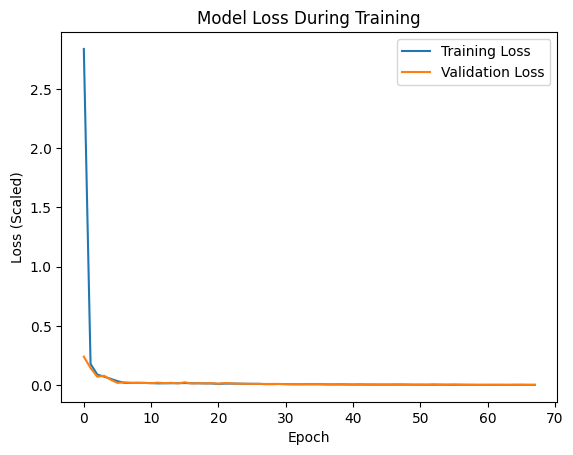

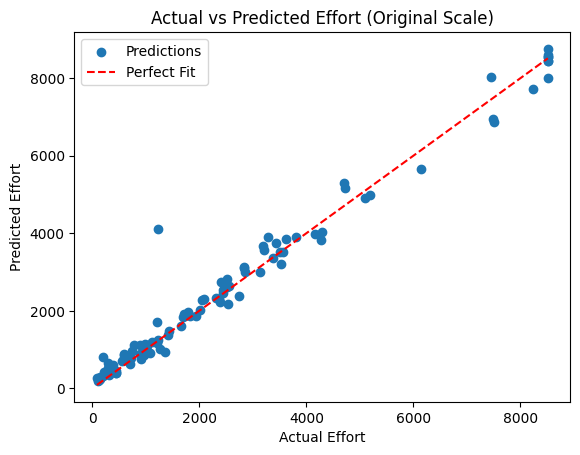

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

# Calculate relative errors for MMRE and MdMRE
relative_errors = np.abs((y_test_original - y_pred) / y_test_original)
mmre = np.mean(relative_errors)
mdmre = np.median(relative_errors)

# Calculate PRED(25)
pred25 = np.mean(relative_errors <= 0.25) * 100

# Print all metrics
print(f"\nEvaluation Metrics (Original Scale):")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MMRE: {mmre:.4f}")
print(f"MdMRE: {mdmre:.4f}")
print(f"PRED(25): {pred25:.2f}%")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Scaled)')
plt.legend()
plt.show()

# Plot actual vs predicted
plt.scatter(y_test_original, y_pred, label='Predictions')
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--', label='Perfect Fit')
plt.xlabel('Actual Effort')
plt.ylabel('Predicted Effort')
plt.title('Actual vs Predicted Effort (Original Scale)')
plt.legend()
plt.show()